机器学习


人工智能三大概念：AI 机器学习（ML）和深度学习（DL）

In [ ]:
import sklearn

机器学习建模流程:
1.

KNN算法

In [ ]:
#1.导包
from sklearn.neighbors import KNeighborsClassifier
#2.准备数据集
x_train=[[0],[1],[2],[3]]
y_train=[0,0,1,1]
x_test=[[5]]
#3.创建模型
model=KNeighborsClassifier(n_neighbors=2)
#4.模型训练
model.fit(x_train,y_train)
#5.模型预测
y_pre=model.predict(x_test)
print(y_pre)

In [ ]:
#1.导包
from sklearn.neighbors import KNeighborsRegressor
#2.准备数据集
x_train=[[0,0,1],[1,1,0],[3,10,10],[4,11,12]]
y_train=[0.1,0.2,0.3,0.4]
x_test=[[3,10,11]]
#3.创建模型
model=KNeighborsRegressor(n_neighbors=2)
#4.模型训练
model.fit(x_train,y_train)
#5.模型预测
y_pre=model.predict(x_test)
print(y_pre)

特征与处理之归一化操作（x=(当前值-min)/(max-min)）(处理小数据集适用 容易受到最大值最小值影响)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_train=[[90,2,10,40],[60,4,15,45],[75,3,13,46]]
#2.创建归一化对象
scaler=MinMaxScaler(feature_range=(0,1))
#3.队员数据集进行归一化操作
x_train_new=scaler.fit_transform(x_train)
print(x_train_new)


数据标准化 结果=(x-mean)/标准差(都是为了解决量纲问题)



In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_train=[[90,2,10,40],[60,4,15,45],[75,3,13,46]]
#2.创建标准化化对象
scaler=StandardScaler()
#3.队员数据集进行归一化操作
x_train_new=scaler.fit_transform(x_train)
print(x_train_new)
print(f'数据集的均值:{scaler.mean_}')

利用KNN算法对鸢尾花进行分类
1.加载数据
2.数据预处理
3.特征工程
4.模型训练
5.模型评估
6.模型预测


In [ ]:
# 导入类库
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score


#1.定义函数 加载鸢尾花数据集并查看数据集
def dm01_loadris():
    #1.加载鸢尾花数据集
    iris_data=load_iris()
    #2.查看数据集
    print(f'数据集:{iris_data}')
    print(f'数据集类型{type(iris_data)}')
    #3.查看所有键
    print(f'查看数据集所有键{iris_data.keys()}')
    print(iris_data.target_names)
    print(iris_data.feature_names)
    print(iris_data.filename)

#2.定义函数，绘制数据集散点图
def dm02_show_iris():
    iris_data=load_iris()
    #2.把鸢尾花数据转化为Dataframe
    iris_df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    #3.给df搞标签列
    iris_df['labels']=iris_data.target
    print(iris_df)
    #4.绘制散点图
    sns.lmplot(data=iris_df,x='sepal length (cm)',y='sepal width (cm)',hue='labels',fit_reg=False)
    #5.设置标题
    plt.title('iris data')
    plt.tight_layout()
    plt.show()
#3.切分训练集测试集

def dm03_split_train_test():
    iris_data=load_iris()
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    print(x_train,x_test,y_train,y_test,len(x_train),len(x_test),len(y_train),len(y_test))
#4.实现鸢尾花完整案例 收集数据 预处理 标准化 模型训练 评估 预测
def dm04_iris_evaluate_test():
    #1.加载数据
    iris_data=load_iris()
    #2.数据预处理
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    #3.特征工程
    #思考1：特征都是用的不用选
    #思考二：特征预处理：因为原数据差别不大 无需预处理 但更完善
    #3.1创建标准化
    transfer=StandardScaler()
    #3.2对特征列进行标准化
    #fit_transform 兼具fit和transform功能 即：训练 转换 该函数适用于：第一次进行标准化的时候，一般用于处理训练集

    x_train=transfer.fit_transform(x_train)
    #transform 只有转化 该函数适用于 重复进行标准化动作 一般用于对测试集进行标准化
    x_test=transfer.transform(x_test)
    #4.模型训练
    #4.1创建模型对象
    estimator=KNeighborsClassifier(n_neighbors=3)
    #4.2训练
    estimator.fit(x_train,y_train)

    #5.模型预测
    #场景一：切分的测试集
    y_pre=estimator.predict(x_test)
    print(y_pre)
    #场景二：对新的数据集搞
    my_data=[[7.8,2.1,3.9,1.6]]
    #shujuji标准化
    my_data=transfer.transform(my_data)
    y_pre_new=estimator.predict(my_data)
    print(y_pre_new)
    #5.4查看上述数据集每种分类的概率
    y_pre_proba=estimator.predict_proba(my_data)
    print(y_pre_proba)
    #6.模型预测
    #方式1：直接评分 基于测试机的标签 训练集的标签
    print(f'正确率:{estimator.score(x_test,y_test)}')
    #方式2：基于测试机的标签和预测结果进行评分
    print(f'正确率：{accuracy_score(y_test,y_pre)}')

#5.测试
if __name__ == '__main__':
    dm01_loadris()
    dm02_show_iris()
    dm03_split_train_test()
    dm04_iris_evaluate_test()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#1.定义函数 加载鸢尾花数据集并查看数据集
def dm01_loadris():
    #1.加载鸢尾花数据集
    iris_data=load_iris()
    #2.查看数据集
    print(f'数据集:{iris_data}')
    print(f'数据集类型{type(iris_data)}')
    #3.查看所有键
    print(f'查看数据集所有键{iris_data.keys()}')
    print(iris_data.target_names)
    print(iris_data.feature_names)
    print(iris_data.filename)

#2.定义函数，绘制数据集散点图
def dm02_show_iris():
    iris_data=load_iris()
    #2.把鸢尾花数据转化为Dataframe
    iris_df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    #3.给df搞标签列
    iris_df['labels']=iris_data.target
    print(iris_df)
    #4.绘制散点图
    sns.lmplot(data=iris_df,x='sepal length (cm)',y='sepal width (cm)',hue='labels',fit_reg=False)
    #5.设置标题
    plt.title('iris data')
    plt.tight_layout()
    plt.show()
#3.切分训练集测试集

def dm03_split_train_test():
    iris_data=load_iris()
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    print(x_train,x_test,y_train,y_test,len(x_train),len(x_test),len(y_train),len(y_test))
#4.实现鸢尾花完整案例 收集数据 预处理 标准化 模型训练 评估 预测
def dm04_iris_evaluate_test():
    #1.加载数据
    iris_data=load_iris()
    #2.数据预处理
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    #3.特征工程
    #思考1：特征都是用的不用选
    #思考二：特征预处理：因为原数据差别不大 无需预处理 但更完善
    #3.1创建标准化
    transfer=StandardScaler()
    #3.2对特征列进行标准化
    #fit_transform 兼具fit和transform功能 即：训练 转换 该函数适用于：第一次进行标准化的时候，一般用于处理训练集

    x_train=transfer.fit_transform(x_train)
    #transform 只有转化 该函数适用于 重复进行标准化动作 一般用于对测试集进行标准化
    x_test=transfer.transform(x_test)
    #4.模型训练
    #4.1创建模型对象
    estimator=KNeighborsClassifier()

    #使用交叉验证
    para_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}
    #创建Grid 找到最优参数
    #参一：要计算的模型对象
    #参二：该模型超参可能出现的值
    #参三：交叉验证的折数
    #返回值estimator：处理后的模型对象
    estimator=GridSearchCV(estimator=estimator,param_grid=para_grid,cv=4)
    #训练
    estimator.fit(x_train,y_train)
    print(f'最有评分:{estimator.best_score_}')
    print(estimator.best_params_)
    print(estimator.best_estimator_)
    print(estimator.cv_results_)

    #4.2训练
    estimator.fit(x_train,y_train)

    #5.模型预测
    #场景一：切分的测试集
    y_pre=estimator.predict(x_test)
    print(y_pre)
    #场景二：对新的数据集搞
    my_data=[[7.8,2.1,3.9,1.6]]
    #shujuji标准化
    my_data=transfer.transform(my_data)
    y_pre_new=estimator.predict(my_data)
    print(y_pre_new)
    #5.4查看上述数据集每种分类的概率
    y_pre_proba=estimator.predict_proba(my_data)
    print(y_pre_proba)
    #6.模型预测
    #方式1：直接评分 基于测试机的标签 训练集的标签
    print(f'正确率:{estimator.score(x_test,y_test)}')
    #方式2：基于测试机的标签和预测结果进行评分
    print(f'正确率：{accuracy_score(y_test,y_pre)}')
#模型评估

#5.测试
if __name__ == '__main__':
    dm01_loadris()
    dm02_show_iris()
    dm03_split_train_test()
    dm04_iris_evaluate_test()


手写数字识别

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib
from collections import Counter

def show_digit(idx):
    # 1 加载数据
    data = pd.read_csv('data/手写数字识别.csv')
    if idx < 0 or idx > len(data) - 1:
        return
    # 2 打印数据基本信息
    x = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    print('数据基本信息：', x.shape)
    print('类别数据比例：', Counter(y))

    print('当前数字的标签为：', y[idx])

    # 3 显示指定的图片 # data修改为ndarray 类型
    data_ = x.iloc[idx].values
    # 将数据形状修改为 28*28
    data_ = data_.reshape(28, 28)
    # 关闭坐标轴标签
    plt.axis('off')
    # 显示图像
    plt.imshow(data_, cmap='gray')
    plt.show()

def train_model():
    # 1 加载手写数字数据集
    data = pd.read_csv('data/手写数字识别.csv')

    # 2 数据预处理 归一化
    x = data.iloc[:, 1:] / 255
    y = data.iloc[:, 0]

    # 3 分割数据集
    split_data = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
    x_train, x_test, y_train, y_test = split_data

    # 4 模型训练
    estimator = KNeighborsClassifier(n_neighbors=3)
    estimator.fit(x_train, y_train)

    # 5 模型评估
    acc = estimator.score(x_test, y_test)
    print('测试集准确率: %.2f' % acc)

    # 6 模型保存
    joblib.dump(estimator, 'model/knn.pth')

def test_model():
    # 1 读取图片数据
    img = plt.imread('data/demo.png')
    plt.imshow(img)

    # 2 加载模型
    knn = joblib.load('model/knn.pth')

    # 3 预测图片
    y_pred = knn.predict(img.reshape(1, -1))
    print('您绘制的数字是：', y_pred)


线性回归

In [ ]:
from sklearn.linear_model import LinearRegression
x_train=[[160],[166],[172],[174],[180]]
y_train=[56.3,60.6,65.1,68.5,75]
x_test=[[176]]
estimator=LinearRegression()
estimator.fit(x_train,y_train)
#可以查看下权重和斜率
print(estimator.coef_)
print(estimator.intercept_)

y_pred=estimator.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error
#银行信贷 梯度下降求解

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV

#波士顿房价预测
#1。加载数据
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# print(f'原始数据:{data.shape}')
# print(data[:5])
#2.数据的预处理
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
#3.特征工程
#3.1创建标准化对象
transfer=StandardScaler()
#3.2训练集标准化
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#4.模型训练
#4.1创建线性回归正规方程
estimator=LinearRegression(fit_intercept=True)
estimator.fit(x_train,y_train)
#4.2打印权重和偏置
print(f'权重{estimator.coef_}')
print(estimator.intercept_)

#5。模型预测
y_pre=estimator.predict(x_test)

#6.模型评估
print(f'均方误差：{mean_squared_error(y_test,y_pred)}')
print(f'均方根误差：{root_mean_squared_error(y_test,y_pred)}')
print(f'平均绝对误差：{mean_absolute_error(y_test,y_pred)}')






#梯度下降法
from sklearn.metrics import root_mean_squared_error
#银行信贷 梯度下降求解

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV

#波士顿房价预测
#1。加载数据
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# print(f'原始数据:{data.shape}')
# print(data[:5])
#2.数据的预处理
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
#3.特征工程
#3.1创建标准化对象
transfer=StandardScaler()
#3.2训练集标准化
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#4.模型训练
#4.1创建线性回归正规方程
estimator=SGDRegressor(fit_intercept=True,learning_rate='constant',max_iter=10000,eta0=0.01)
estimator.fit(x_train,y_train)
#4.2打印权重和偏置
print(f'权重{estimator.coef_}')
print(estimator.intercept_)

#5。模型预测
y_pre=estimator.predict(x_test)

#6.模型评估
print(f'均方误差：{mean_squared_error(y_test,y_pred)}')
print(f'均方根误差：{root_mean_squared_error(y_test,y_pred)}')
print(f'平均绝对误差：{mean_absolute_error(y_test,y_pred)}')







In [ ]:
#欠拟合过程
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_under_fitting():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('myret-->', myret)

    # 6 画图
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r')
    plt.show()
if __name__ == '__main__':
    dm01_under_fitting()





#刚好拟合
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_模型欠拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    # 将x转换为矩阵形式 (100, 1)
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm01 myret-->', myret)

    # 6 画图
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r')
    plt.title("Underfitting (Linear Fit)")
    plt.show()

def dm02_模型ok():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加二次项，通过 hstack 将 X 和 X^2 拼接
    X2 = np.hstack([X, X ** 2])

    estimator.fit(X2, y)

    # 4 模型预测
    y_predict = estimator.predict(X2)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm02 myret-->', myret)

    # 6 画图
    plt.scatter(x, y)
    # plt.plot(x, y_predict, color='r') # 直接画图会乱，因为x是无序的

    # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
    # np.argsort(x) 返回的是排序后的索引
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.title("Better Fit (Polynomial)")
    plt.show()

if __name__ == '__main__':
    # 运行第一个函数：演示欠拟合（直线拟合曲线）
    dm01_模型欠拟合()

    # 运行第二个函数：演示效果较好的模型（引入二次项）
    dm02_模型ok()



















import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_模型欠拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm01_欠拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Underfitting (Linear Model)")
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r')
    plt.show()

def dm02_模型ok():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加二次项
    X2 = np.hstack([X, X ** 2])
    estimator.fit(X2, y)

    # 4 模型预测
    y_predict = estimator.predict(X2)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm02_拟合良好 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Good Fit (Polynomial Degree 2)")
    plt.scatter(x, y)
    # plt.plot(x, y_predict, color='r')
    # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm03_模型过拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加高次项 (一直加到10次方)，导致特征过多
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
    estimator.fit(X3, y)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm03_过拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Overfitting (Polynomial Degree 10)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

if __name__ == '__main__':
    # 依次运行三个函数查看效果
    print("--- 1. 欠拟合示例 ---")
    dm01_模型欠拟合()

    print("\n--- 2. 拟合良好示例 ---")
    dm02_模型ok()

    print("\n--- 3. 过拟合示例 ---")
    dm03_模型过拟合()


In [ ]:
#解决方法 正则化
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_模型欠拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm01_欠拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Underfitting (Linear)")
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r') # 注意：这里x未排序，直接画直线没问题，但如果是曲线会乱
    plt.show()

def dm02_模型ok():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加二次项
    X2 = np.hstack([X, X ** 2]) # 数据增加二次项
    estimator.fit(X2, y)

    # 4 模型预测
    y_predict = estimator.predict(X2)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm02_拟合良好 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Good Fit (Degree 2)")
    plt.scatter(x, y)
    # plt.plot(x, y_predict, color='r')
    # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm03_模型过拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加高次项 (一直加到10次方)
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]) # 数据增加高次项
    estimator.fit(X3, y)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm03_过拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Overfitting (Degree 10)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm04_模型过拟合_L1正则化():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化L1正则化模型 做实验:alpha惩罚力度越来越大k值越来越小,返回会欠拟合
    # 注意: normalize=True 在新版sklearn中已弃用，如果报错请删除该参数
    try:
        estimator = Lasso(alpha=0.005, normalize=True)
    except TypeError:
        print("提示: 当前sklearn版本不支持normalize参数，已自动移除")
        estimator = Lasso(alpha=0.005)

    # 3 训练模型
    X = x.reshape(-1, 1)
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
    estimator.fit(X3, y)

    print('Lasso estimator.coef_', estimator.coef_)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm04_L1正则化 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Lasso Regularization (L1)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm05_模型过拟合_L2正则化():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化L2正则化模型
    # 注意: normalize=True 在新版sklearn中已弃用，如果报错请删除该参数
    try:
        estimator = Ridge(alpha=100, normalize=True)
    except TypeError:
        print("提示: 当前sklearn版本不支持normalize参数，已自动移除")
        estimator = Ridge(alpha=100)

    # 3 训练模型
    X = x.reshape(-1, 1)
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
    estimator.fit(X3, y)

    print('Ridge estimator.coef_', estimator.coef_)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm05_L2正则化 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Ridge Regularization (L2)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

if __name__ == '__main__':
    # 依次运行查看效果
    dm01_模型欠拟合()
    dm02_模型ok()
    dm03_模型过拟合()
    dm04_模型过拟合_L1正则化()
    dm05_模型过拟合_L2正则化()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
data=pd.read_csv("C:/Users/王晋华/Desktop/breast-cancer-wisconsin.csv")

data.replace('?',np.nan,inplace=True)
data.dropna(axis=0,inplace=True,ignore_index=True)



#特征工程 提取 预处理
#提取特征与标签
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
y=data['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)
transformer = StandardScaler()
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)
estimator = LogisticRegression()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
print(estimator.score(x_test, y_test))
print(accuracy_score(y_test, y_predict))#预测准确率并不能满足各种需求
#要通过混淆矩阵来评测 即：精确率召回率 ROC曲线 AOC值
#精确率：tp/(tp+fn) 召回率：tp/(tp+fn) F1:2*精确率*召回率/（精确率+召回率）
#演示混淆矩阵
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics  import classification_report
y_train=['恶性','恶性','恶性','恶性','恶性','恶性','良性','良性','良性','良性']
y_pre_A=['良性','恶性','良性','良性','恶性','恶性','良性','良性','良性','良性']
y_pre_B=['恶性','恶性','恶性','恶性','恶性','恶性','恶性','恶性','良性','恶性']

label=['恶性','良性']
df_label=['恶性（正例）','良性（反例）']
cm_A=confusion_matrix(y_train, y_pre_A,labels=label)
cm_B=confusion_matrix(y_train, y_pre_B,labels=label)

df_A=pd.DataFrame(cm_A,index=label,columns=df_label)
df_B=pd.DataFrame(cm_B)
print(df_A)
print(df_B)
print(precision_score(y_train, y_pre_A, pos_label='恶性'))
print(recall_score(y_train,y_pre_A,pos_label='恶性'))
print(precision_score(y_train, y_pre_B, pos_label='恶性')
print(classification_report(y_train,y_pre_A,labels=label,target_names=None)))

In [ ]:
#真实案例
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#1.数据的预处理
def data_processing():
    df=pd.read_csv("C:/Users/王晋华/Desktop/churn.csv")

    df=pd.get_dummies(df,columns=['Churn','gender'])
    df.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
    df.rename(columns={'Churn_Yes':'flag'})
    print(df.head())
    print(df.shape)


#2.数据的可视化
def data_visualization():
    df=pd.read_csv("C:/Users/王晋华/Desktop/churn.csv")

    df=pd.get_dummies(df,columns=['Churn','gender'])
    df.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
    df.rename(columns={'Churn_Yes':'flag'})

    print(df.columns)
    '''
    Index(['Partner_att', 'Dependents_att', 'landline', 'internet_att',)
       'internet_other', 'StreamingTV', 'StreamingMovies', 'Contract_Month',
       'Contract_1YR', 'PaymentBank', 'PaymentCreditcard', 'PaymentElectronic',
       'MonthlyCharges', 'TotalCharges', 'Churn_Yes', 'gender_Female'],
      dtype='object')
      '''
    sns.countplot(data=df,x='Contract_Month',hue='Churn_Yes')
#3.模型训练
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
def logic():
    df=pd.read_csv("C:/Users/王晋华/Desktop/churn.csv")

    df=pd.get_dummies(df,columns=['Churn','gender'])
    df.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
    df.rename(columns={'Churn_Yes':'flag'})
    #提取特征
    x=df[['Contract_Month','internet_other','PaymentElectronic' ]]
    y=df['Churn_Yes']
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)

    estimator = LogisticRegression()
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    print(y_pred)
    print(estimator.score(x_test,y_test))
    print(accuracy_score(y_test,y_pred))

#4.测试

if __name__ == "__main__":
    data_processing()
    data_visualization()
    logic()

决策树

明白条件熵 信息增益 以及信息熵 信息增益率=信息增益/特征熵 1/特征熵就是惩罚系数


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def dm04_泰坦尼克():
    # 1 读数据到内存
    taitan_df = pd.read_csv("./data/titanic/train.csv")
    taitan_df.head()        # 查看前5条数据
    taitan_df.info()         # 查看特性信息

    # 2 数据基本处理
    # 2-1 确定x y
    x = taitan_df[['Pclass', 'Age', 'Sex']]
    y = taitan_df['Survived']

    # 2-2 缺失值处理
    x=x.copy()
    x['Age']=x['Age'].fillna(x['Age'].mean(), inplace=True)

    # 2-3 类别型数据 one-hot编码
    print('x-->1\n', x)
    x.info()
    x = pd.get_dummies(x)
    print('x-->2\n', x)
    x.info()

    # 2-4 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=33)

    # 3 模型训练 - 决策树分类器
    dec_tree = DecisionTreeClassifier(random_state=33)
    dec_tree.fit(x_train, y_train)

    # 4 模型评估
    y_pred = dec_tree.predict(x_test)
    print("="*50)
    print("模型分类评估报告：")
    print(classification_report(y_test, y_pred))

    # 5 决策树可视化展示
    plt.figure(figsize=(12, 8))
    plot_tree(dec_tree, feature_names=x.columns, class_names=['遇难','存活'], filled=True, rounded=True, fontsize=10)
    plt.title('泰坦尼克号生存预测-决策树模型', fontsize=14)
    plt.show()

    # 6 输出特征重要性
    print("="*50)
    print("特征重要性排序：")
    feature_importance = pd.DataFrame({'特征名':x.columns, '重要性':dec_tree.feature_importances_})
    print(feature_importance.sort_values(by='重要性', ascending=False))

# 调用函数执行
if __name__=='__main__':

    dm04_泰坦尼克()

CART回归 和 线性回归对比


In [ ]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # 回归决策树
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def dm01_回归分类():
    # 1 准备数据
    x = np.array(list(range(1,11))).reshape(-1, 1)
    y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05])
    print('x-->\n', x)
    print('y-->\n', y)

    # 2 实例化模型 模型训练
    model1 = DecisionTreeRegressor(max_depth=1,ccp_alpha=1.40000000e-03)
    model2 = DecisionTreeRegressor(max_depth=3)
    model3 = LinearRegression()
    model1.fit(x, y)
    model2.fit(x, y)
    model3.fit(x, y)

    # 3 模型预测 # 等差数组-按照间隔
    x_test = np.arange(0.0, 10.0, 0.01).reshape(-1, 1)
    y_pre1 = model1.predict(x_test)
    y_pre2 = model2.predict(x_test)
    y_pre3 = model3.predict(x_test)
    print(y_pre1.shape, y_pre2.shape, y_pre3.shape)

    # 4 结果可视化
    plt.figure(figsize=(10, 6), dpi=100)
    plt.scatter(x, y, label='data')

    plt.plot(x_test, y_pre1, label='max_depth=1') # 深度1层
    plt.plot(x_test, y_pre2, label='max_depth=3') # 深度3层
    plt.plot(x_test, y_pre3, label='linear')
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title('DecisionTreeRegressor')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    dm01_回归分类()

In [ ]:
#剪枝
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X= np.array(list(range(1,11))).reshape(-1, 1)
y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05])
# 假设 X, y 已经准备好了
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 1. 实例化一个不加限制的树（让它疯长）
clf = DecisionTreeRegressor(random_state=0)

# 2. 获取这一棵树的剪枝路径
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # 这里就是程序算出来的“候选alpha列表”
impurities = path.impurities

print(f"提取到了 {len(ccp_alphas)} 个候选 alpha 值")
print(ccp_alphas)

# 3. 循环测试每一个 alpha 的效果
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 4. 记录训练集和测试集的分数
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# 5. 可视化找最佳点
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("精度 (Score)")
ax.set_title("Alpha vs 精度 (训练集 vs 测试集)")
ax.plot(ccp_alphas, train_scores, marker='o', label="训练集", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="测试集", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#随机森林算法
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


df=pd.read_csv("")


x=df[['Pclass','Sex','Age']].copy()
y=df['Survived']
x['Age']=x['Age'].fillna(x['Age'].mean(), inplace=False)
x=pd.get_dummies(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


estimator1=DecisionTreeClassifier()
estimator1.fit(x_train,y_train)
y_pred=estimator1.predict(x_test)
print(y_pred)
print(estimator1.score(x_test,y_test))
print('-'*23)



estimator2=RandomForestClassifier(n_estimators=100,max_dept=None)
estimator2.fit(x_train,y_train)
y_pred2=estimator2.predict(x_test)
print(y_pred2)
print(estimator2.score(x_test,y_test))


estimator3=RandomForestClassifier
params={'n_estimators':[60,90,120,150],'max_depth':[3,5,7,9]}
ge_estimator=GridSearchCV(estimator=estimator3,param_grid=params,scoring='accuracy',cv=2)
ge_estimator.fit(x_train,y_train)
y_pred3=ge_estimator.predict(x_test)
print(y_pred3)
print(ge_estimator.score(x_test,y_test))
print('-'*23)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier # 集成学习
from sklearn.metrics import accuracy_score


def dm01_adaboost():


    df_wine = pd.read_csv('"C:/Users/王晋华/Desktop/红酒品质分类.csv"')
    df.info()

    #2.1 从列表中过滤掉列表一 剩下2 3
    df_wine=df_wine[df_wine['class label']!=1]


    # 2-3 准备特征值和目标值
    # 选取 'Alcohol' (酒精) 和 'Hue' (颜色/色调) 作为特征
    # 注意：如果是内置数据集，确保列名已对应
    x = df_wine[['Alcohol', 'Hue']].values
    y = df_wine['Class label'].values

    # 2-4 类别转化 y (2,3) => (0,1)
    # 因为 AdaBoost 默认处理 0/1 标签
    le = LabelEncoder()
    y = le.fit_transform(y)
    print('类别标签转化后的 y (前10个):', y[:10])

    # 2-5 划分数据
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=22, test_size=0.2)
    print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")


    # --- 3. (补全部分) 模型训练 ---
    # AdaBoost 的核心：弱分类器通常是一个“树桩”（max_depth=1 的决策树）
    # 这种树很弱，只切一刀，但 AdaBoost 会把很多这样的树组合起来
    estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(estimator.score(X_test, y_test))


    # n_estimators=50: 让50个弱分类器来投票
    # learning_rate=1.0: 学习率，控制每个弱分类器的权重缩减
    best_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )

    print("开始训练 AdaBoost...")
    model.fit(X_train, y_train)

    # --- 4. (补全部分) 预测与评估 ---
    y_predict = model.predict(X_test)

    # 计算准确率
    score = accuracy_score(y_test, y_predict)
    print("=" * 30)
    print(f"AdaBoost 预测准确率: {score:.4f}")
    print("=" * 30)

    # 打印一下真实的类别和预测的类别对比（前10个）
    print("真实值:", y_test[:10])
    print("预测值:", y_predict[:10])

if __name__ == '__main__':
    dm01_adaboost()

梯度提升树

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

def dm01_gbdtapi():
    # --- 1. 读取数据 ---
    try:
        # 尝试读取本地文件
        taitan_df = pd.read_csv('./data/titanic/train.csv')
    except FileNotFoundError:
        print("未找到本地 csv，正在加载 seaborn 内置泰坦尼克数据作为替代...")
        import seaborn as sns
        taitan_df = sns.load_dataset('titanic')
        # 简单映射列名以匹配原代码逻辑
        taitan_df.rename(columns={'survived': 'Survived', 'pclass': 'Pclass', 'age': 'Age', 'sex': 'Sex'}, inplace=True)


    # --- 2. 数据预处理 ---
    # 2-1 特征选择
    taitan_df.info()
    x = taitan_df[['Pclass', 'Age', 'Sex']].copy()
    y = taitan_df['Survived'].copy()

    # 2-2 缺失值处理
    # 注意：inplace=True 在新版 pandas 中不推荐，建议使用赋值写法
    x['Age'] = x['Age'].fillna(x['Age'].mean())

    # 2-3 独热编码 (One-Hot)
    # 这一步会将 'Sex' 列转换为 'Sex_female' 和 'Sex_male'
    # 注意：'Pclass'如果是数字类型，get_dummies 默认不会处理它，若需处理需先转为 str
    x = pd.get_dummies(x)

    # 2-4 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, test_size=0.2)

    # --- 3. GBDT 基础训练和评估 ---
    print("=== 开始基础训练 ===")
    estimator = GradientBoostingClassifier(n_estimators=120, random_state=9)
    estimator.fit(x_train, y_train)

    base_score = estimator.score(x_test, y_test)
    print(f"GBDT 默认参数得分: {base_score:.4f}")
    print(estimator.score(x_test, y_test))
    print(classification_report(y_test, estimator.predict(x_test)))

    # --- 4. GBDT 网格搜索 (GridSearch) ---
    print("\n=== 开始网格搜索 ===")
    estimator = GradientBoostingClassifier()

    # 定义参数字典
    param_grid = {
        "n_estimators": [80,90,100, 110, 120, 130],  # 树的数量
        "max_depth": [2, 3, 4,5],               # 树的深度
        "random_state": [9]                   # 随机种子
    }

    # 实例化 GridSearchCV (cv=3 表示 3折交叉验证)
    grid_search = GridSearchCV(estimator, param_grid=param_grid, cv=3)
    grid_search.fit(x_train, y_train)

    # 获取结果
    print(f"网格搜索最佳测试集得分: {grid_search.score(x_test, y_test):.4f}")
    print("最佳参数模型详情:", grid_search.best_estimator_)

if __name__ == '__main__':
    dm01_gbdtapi()

未找到本地 csv，正在加载 seaborn 内置泰坦尼克数据作为替代...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
=== 开始基础训练 ===
GBDT 默认参数得分: 0.7542
0.754

极限梯度提升树 XGBoost

In [18]:
import xgboost as xgb
import joblib
import numpy as np
import pandas as pd
import xgboost as xgb
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
# 基本数据处理
import warnings
warnings.filterwarnings("ignore")
def dm01_realdata():
    # 1 加载训练集
    data = pd.read_csv("C:/Users/王晋华/Desktop/红酒品质分类.csv")
    x = data.iloc[:, :-1]
    y = data.iloc[:, -1] - 3

    # 2 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=22)

    # 3 数据存储
    pd.concat([x_train, y_train], axis=1).to_csv('C:/Users/王晋华/Desktop/红酒品质分类-train.csv')
    pd.concat([x_test, y_test], axis=1).to_csv('C:/Users/王晋华/Desktop/红酒品质分类-test.csv')

def dm02_训练模型():
    # 1 加载数据集
    train_data = pd.read_csv('C:/Users/王晋华/Desktop/红酒品质分类-train.csv')
    test_data = pd.read_csv('C:/Users/王晋华/Desktop/红酒品质分类-test.csv')

    # 2 准备数据 训练集测试集
    x_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    x_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    # 3 xgb模型训练
    estimator = xgb.XGBClassifier(n_estimators=100, objective='multi:softmax',
                                  eval_metric='merror', eta=0.1, use_label_encoder=False, random_state=22,learning_rate=0.1,max_depth=3)
    estimator.fit(x_train, y_train)

    # 4 xgb模型评估
    y_pred = estimator.predict(x_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))

    # 5 模型保存
    joblib.dump(estimator, 'C:/Users/王晋华/Desktop/mymodelxgboost.pth')

    from sklearn.utils import class_weight

def dm03_训练模型():
    # 1 加载数据集
    train_data = pd.read_csv('C:/Users/王晋华/Desktop/红酒品质分类-train.csv')
    test_data = pd.read_csv('C:/Users/王晋华/Desktop/红酒品质分类-test.csv')

    # 2 准备数据 训练集测试集
    x_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    x_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    # 2-2 样本不均衡问题处理
    classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

    # 3 xgb模型训练
    estimator = xgb.XGBClassifier(n_estimators=100, objective='multi:softmax',
                                  eval_metric='merror', eta=0.1, use_label_encoder=False, random_state=22)
    # 训练的时候，指定样本的权重
    estimator.fit(x_train, y_train, sample_weight=classes_weights)

    # 4 xgb模型评估
    y_pred = estimator.predict(x_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))

    from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

def dm04_交叉验证网格搜索():
    # 1 加载数据集
    train_data = pd.read_csv('C:/Users/王晋华/Desktop/红酒品质分类-train.csv')
    test_data = pd.read_csv('C:/Users/王晋华/Desktop/红酒品质分类-test.csv')

    # 2 准备数据 训练集测试集
    x_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    x_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    # 3 交叉验证时,采用分层抽取
    spliter = StratifiedKFold(n_splits=5, shuffle=True)

    # 4 模型训练
    # 4-1 定义超参数
    param_grid = {'max_depth': np.arange(3, 5, 1),
                  'n_estimators': np.arange(50, 150, 50),
                  'eta': np.arange(0.1, 1, 0.3)}

    # 4-2 实例化xgb
    estimator = xgb.XGBClassifier(n_estimators=100,
                                  objective='multi:softmax',
                                  eval_metric='merror',
                                  eta=0.1,
                                  use_label_encoder=False,
                                  random_state=22)

    # 4-2 实例化cv工具 (原代码注释有重复，此处按逻辑修正)
    estimator = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=spliter)

    # 4-3 训练模型
    estimator.fit(x_train, y_train)

    # 5 模型评估
    y_pred = estimator.predict(x_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print('estimator.best_estimator_-->', estimator.best_estimator_)
    print('estimator.best_params_-->', estimator.best_params_)
if __name__ == '__main__':
    dm01_realdata()
    dm02_训练模型()
    dm03_训练模型()
    dm04_交叉验证网格搜索()

(1279, 12) (1279,) (320, 12) (320,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.67      0.80      0.73       136
           3       0.59      0.58      0.58       128
           4       0.68      0.47      0.56        40
           5       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.32      0.31      0.31       320
weighted avg       0.60      0.63      0.61       320

(1279, 12) (1279,) (320, 12) (320,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.18      0.21        11
           2       0.71      0.84      0.77       136
           3       0.67      0.55      0.60       128
           4       0.46      0.47      0.47        40
           5       0.17      0.33      0.22         3

    a

朴素贝叶斯

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB   # 多项分布朴素贝叶斯

def dm02_模型训练():
    # 1 获取数据
    data_df = pd.read_csv('./data/书籍评价.csv', encoding='gbk')
    print('data_df-->\n', data_df)

    # 2 数据基本处理
    # 2-1 处理数据y
    data_df['评论标号'] = np.where(data_df['评价'] == '好评', 1, 0)
    y = data_df['评论标号']
    print('data_df-->\n', data_df)

    # 2-2 加载停用词
    stopwords = []
    try:
        with open('./data/stopwords.txt', 'r', encoding='utf-8') as f:
            lines = f.readlines()
            stopwords = [line.strip() for line in lines]
        stopwords = list(set(stopwords))
    except FileNotFoundError:
        print("提示：未找到stopwords.txt文件，将不使用停用词")

    # 2-3 处理数据x 把文档分词
    comment_list = [','.join(jieba.lcut(line)) for line in data_df['内容']]
    # print('comment_list-->\n', comment_list)

    # 2-4 统计词频矩阵 作为句子特征
    transfer = CountVectorizer(stop_words=stopwords)
    x = transfer.fit_transform(comment_list)

    # 获取特征名称 (兼容旧版和新版sklearn)
    try:
        mynames = transfer.get_feature_names_out()
    except AttributeError:
        mynames = transfer.get_feature_names()

    x = x.toarray()

    # 3 准备训练集测试集
    # 注意：这里是硬编码切分，前10行训练，后面测试
    x_train = x[:10, :]         # 准备训练集
    y_train = y.values[0:10]
    x_test = x[10:, :]          # 准备测试集
    y_test = y.values[10:]
    print('x_train.shape-->', x_train.shape)
    print('y_train.shape-->', y_train.shape)

    # 4 模型训练
    # 4-1 实例化贝叶斯 # 添加拉普拉修正平滑参数
    mymultinomialnb = MultinomialNB()
    mymultinomialnb.fit(x_train, y_train)

    # 4-2 模型预测
    y_pred = mymultinomialnb.predict(x_test)
    print('预测值-->', y_pred)
    print('真实值-->', y_test)

    # 5 模型评估
    myscore = mymultinomialnb.score(x_test, y_test)
    print('myscore-->', myscore)

if __name__ == '__main__':
    dm02_模型训练()

In [ ]:
聚类算法

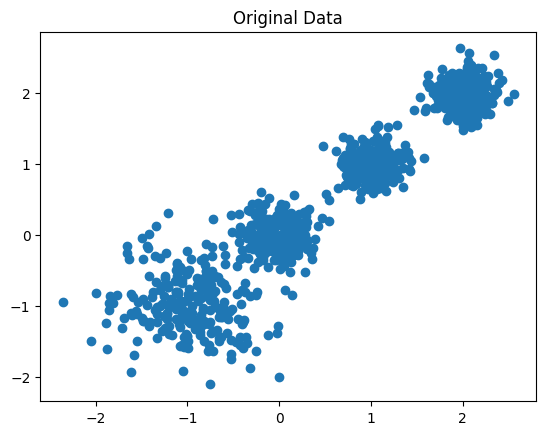

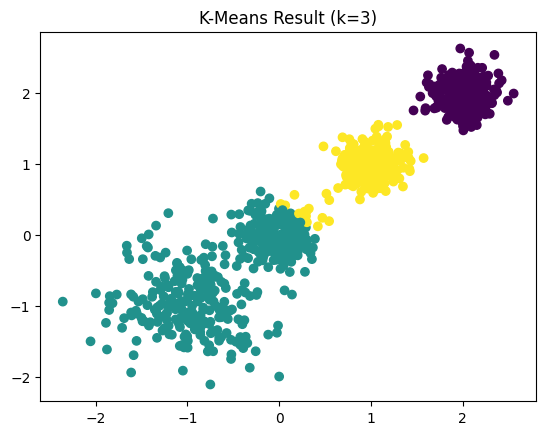

Calinski-Harabasz Score: 2964.3137148168053


In [19]:
# 1. 导入工具包
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import calinski_harabasz_score

# 2. 创建数据集
# 1000个样本, 每个样本2个特征, 4个质心, 数据标准差[0.4, 0.2, 0.2, 0.2]
x, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=[[-1,-1], [0,0], [1,1], [2,2]],
    cluster_std=[0.4, 0.2, 0.2, 0.2],
    random_state=22
)

# 绘制原始数据分布图
plt.figure()
plt.scatter(x[:, 0], x[:, 1], marker='o')
plt.title("Original Data")
plt.show()

# 3. 使用 k-means 进行聚类
# 注意：虽然数据生成了4个中心，但这里演示尝试用 n_clusters=3 进行聚类
y_pred = KMeans(n_clusters=3, random_state=22).fit_predict(x)

# 绘制聚类后的结果图
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.title("K-Means Result (k=3)")
plt.show()

# 4. 模型评估 (CH分数)
# 分数越高，代表聚类效果越好（类内紧凑，类间分离）
score = calinski_harabasz_score(x, y_pred)
print(f"Calinski-Harabasz Score: {score}")

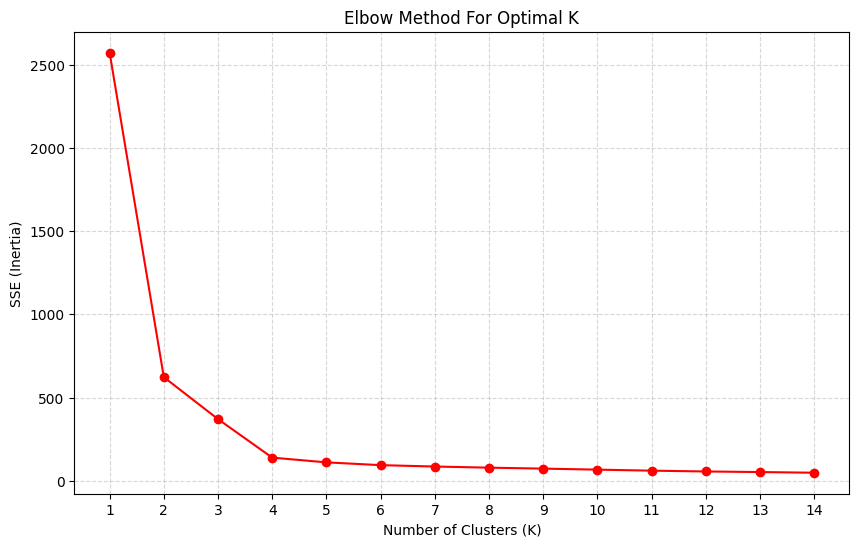

通过图像可观察到 n_clusters=4 时 SSE 下降速度明显变缓（出现拐点），因此最佳值为 4。


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def dm01_SSE_find_optimal_k():
    sse_list = []

    # 1. 产生数据
    # random_state=22 固定随机种子，保证每次生成的数据一致
    # 设定了4个中心点，所以理论上最佳 K 值应该是 4
    x, y = make_blobs(
        n_samples=1000,
        n_features=2,
        centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
        cluster_std=[0.4, 0.2, 0.2, 0.2],
        random_state=22
    )

    # 2. 循环测试不同的 K 值
    # 优化：原代码 range(1, 100) 范围太大，导致图像挤压看不清拐点。
    # 这里改为 range(1, 15) 足以观察到 k=4 的手肘位置。
    k_range = range(1, 15)

    for clu_num in k_range:
        # n_init='auto' 或指定数字可消除警告，random_state固定结果
        my_kmeans = KMeans(n_clusters=clu_num, n_init=10, max_iter=100, random_state=0)
        my_kmeans.fit(x)

        # my_kmeans.inertia_ 返回的是簇内误差平方和 (SSE)
        sse_list.append(my_kmeans.inertia_)

    # 3. 绘图可视化
    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(k_range, sse_list, 'or-') # 'or-' 表示红色圆点实线

    # 设置 X 轴刻度，让每个 K 值都显示出来
    plt.xticks(k_range)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE (Inertia)')
    plt.title('Elbow Method For Optimal K')

    plt.show()
    print("通过图像可观察到 n_clusters=4 时 SSE 下降速度明显变缓（出现拐点），因此最佳值为 4。")

# 运行函数
if __name__ == '__main__':
    dm01_SSE_find_optimal_k()

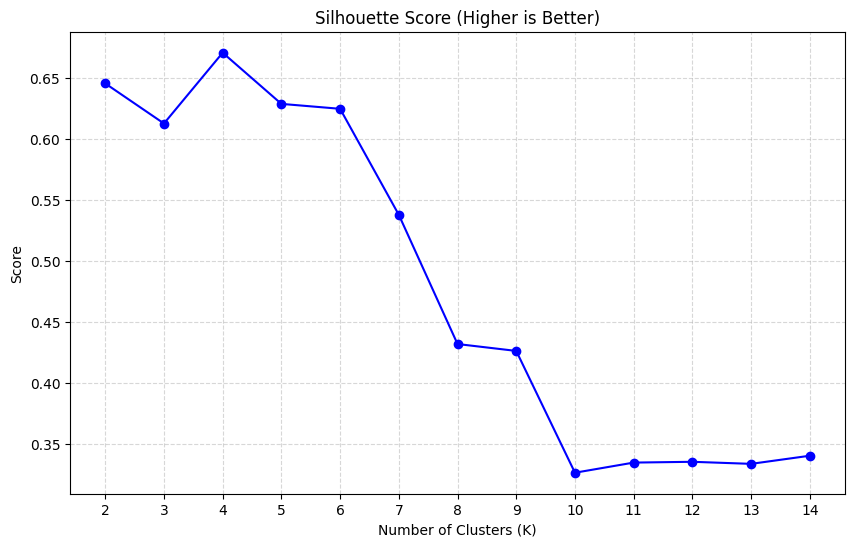

轮廓系数分析：图像最高点对应的 K 值即为最佳聚类数 (应为 4)。


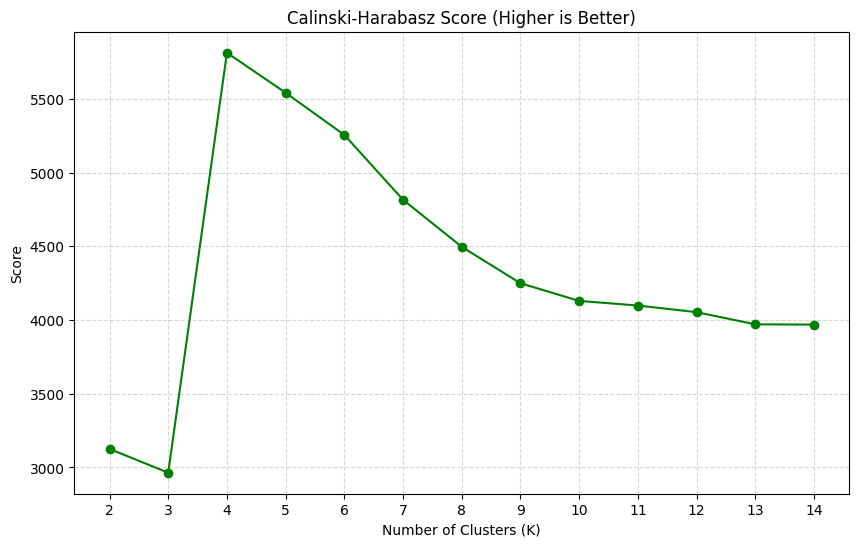

CH 系数分析：图像最高峰对应的 K 值即为最佳聚类数 (应为 4)。


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# ==========================================
# 1. 轮廓系数 (Silhouette Coefficient)
# 范围 [-1, 1]，越接近 1 越好
# ==========================================
def dm02_silhouette_score():
    score_list = []

    # 产生数据: 4个中心点
    x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                      cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=22)

    # 优化范围：只测试 K=2 到 K=15，以便清晰观察峰值
    k_range = range(2, 15)

    for clu_num in k_range:
        my_kmeans = KMeans(n_clusters=clu_num, n_init=10, max_iter=100, random_state=0)
        my_kmeans.fit(x)
        labels = my_kmeans.predict(x)
        # 计算轮廓系数
        score_list.append(silhouette_score(x, labels))

    # 绘图
    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(k_range, score_list, 'ob-') # 蓝色圆点实线
    plt.xticks(k_range)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title('Silhouette Score (Higher is Better)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Score')
    plt.show()
    print("轮廓系数分析：图像最高点对应的 K 值即为最佳聚类数 (应为 4)。")


# ==========================================
# 2. CH 系数 (Calinski-Harabasz Score)
# 分数越高越好，计算速度比轮廓系数快
# ==========================================
def dm03_ch_score():
    score_list = []

    # 产生数据
    x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                      cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=22)

    k_range = range(2, 15)

    for clu_num in k_range:
        my_kmeans = KMeans(n_clusters=clu_num, n_init=10, max_iter=100, random_state=0)
        my_kmeans.fit(x)
        labels = my_kmeans.predict(x)
        # 计算CH系数
        score_list.append(calinski_harabasz_score(x, labels))

    # 绘图
    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(k_range, score_list, 'og-') # 绿色圆点实线
    plt.xticks(k_range)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title('Calinski-Harabasz Score (Higher is Better)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Score')
    plt.show()
    print("CH 系数分析：图像最高峰对应的 K 值即为最佳聚类数 (应为 4)。")

if __name__ == '__main__':
    dm02_silhouette_score()
    dm03_ch_score()